In [1]:
import random as rnd
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchaudio
from torch.utils.data import DataLoader
import torchaudio.prototype.pipelines
import warnings
import classes.ProjectClasses as pcl
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

NVIDIA GeForce RTX 3060


In [3]:
VGGish_pytorch = torchaudio.prototype.pipelines.VGGISH.get_model()

In [4]:
print(VGGish_pytorch)

VGGish(
  (features_network): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mo

In [5]:
print(torchaudio.__version__)

2.4.0.dev20240707


In [6]:
ANNOTATIONS_FILE_TRAIN = "../train_data/metadata/file_labels.csv"
AUDIO_DIR_TRAIN = "../train_data/files"
SAMPLE_RATE = 10000
NUM_SAMPLES = 9600
N_FFT = 400
HOP_LENGTH = 160
N_MELS = 64
LABEL_COL = 1
NUM_CLASSES = 1

tt_utils = pcl.TrainTestUtils(NUM_CLASSES)
mel_spectrogram = torchaudio.transforms.MelSpectrogram(sample_rate = SAMPLE_RATE, n_fft = N_FFT, hop_length = HOP_LENGTH, n_mels = N_MELS)
spr_train = pcl.SpikerboxRecordings(ANNOTATIONS_FILE_TRAIN, AUDIO_DIR_TRAIN, mel_spectrogram, SAMPLE_RATE, NUM_SAMPLES, device, LABEL_COL)

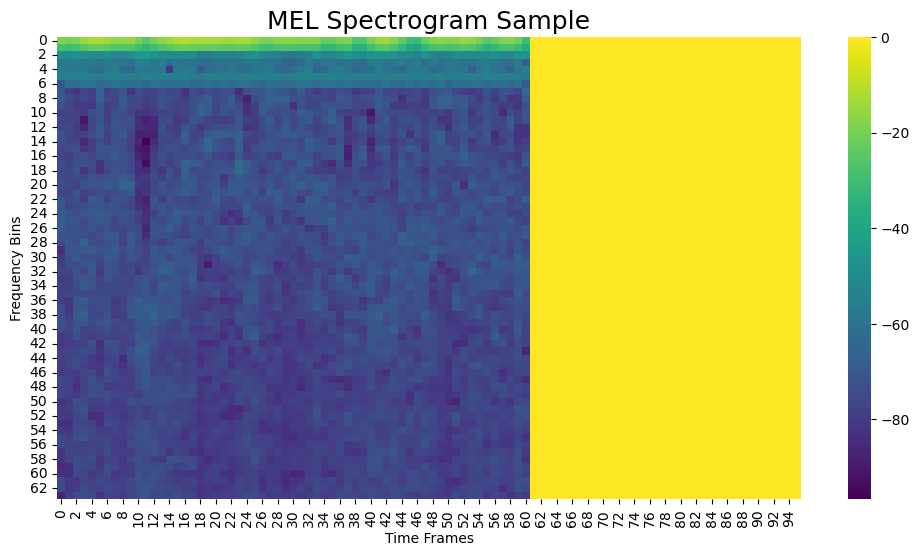

In [7]:
random_position = rnd.randint(0, len(spr_train))
log_mel_tensor_squeezed = np.squeeze(spr_train[random_position][0].cpu(), axis = 0)
plt.figure(figsize = (12, 6))
sns.heatmap(log_mel_tensor_squeezed, cmap = 'viridis')
plt.title('MEL Spectrogram Sample', size=18)
plt.xlabel('Time Frames')
plt.ylabel('Frequency Bins')
plt.savefig("../images/mel_spectrogram_sample.png", dpi = 600)
plt.show()

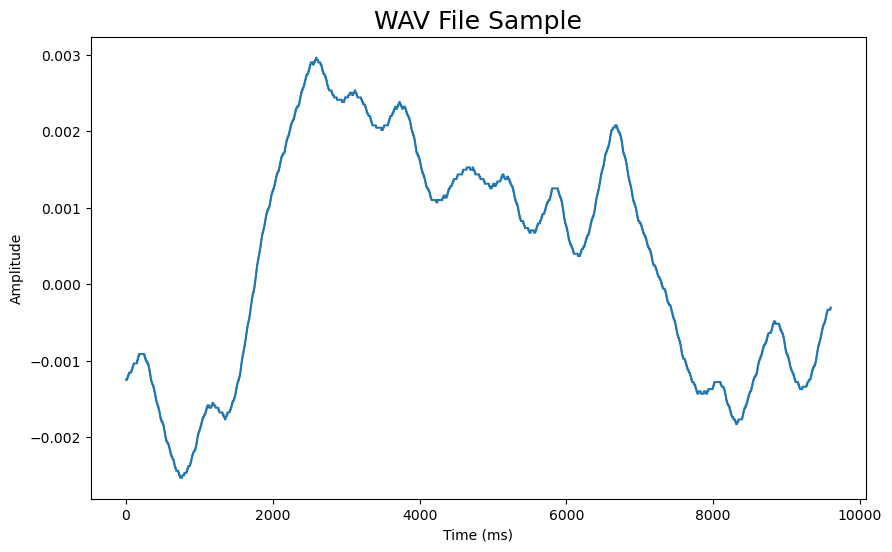

In [8]:
df_labels = pd.DataFrame(pd.read_csv(ANNOTATIONS_FILE_TRAIN))
file_path = f'../train_data/files/{df_labels.loc[random_position, "filename"]}'
waveform, sample_rate = torchaudio.load(file_path)
waveform_np = waveform.squeeze().numpy()
plt.figure(figsize = (10, 6))
sns.lineplot(x = range(len(waveform_np)), y = waveform_np)
plt.title('WAV File Sample', size = 18)
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.savefig("../images/wav_file_sample.png", dpi = 600)
plt.show()